In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings
import video as v
from video_read import download_video

In [142]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [143]:
reload(v)
df,fps = v.get_vid_df('videos/Banned Pokemon Seizure Scene.mp4')
fps

30

In [144]:
df.head()

hue  lightness  saturation
frame y x                            
0     0 0    0         36           0
        1    0         34           0
        2    0         32           0
        3    0         31           0
        4    0         31           0

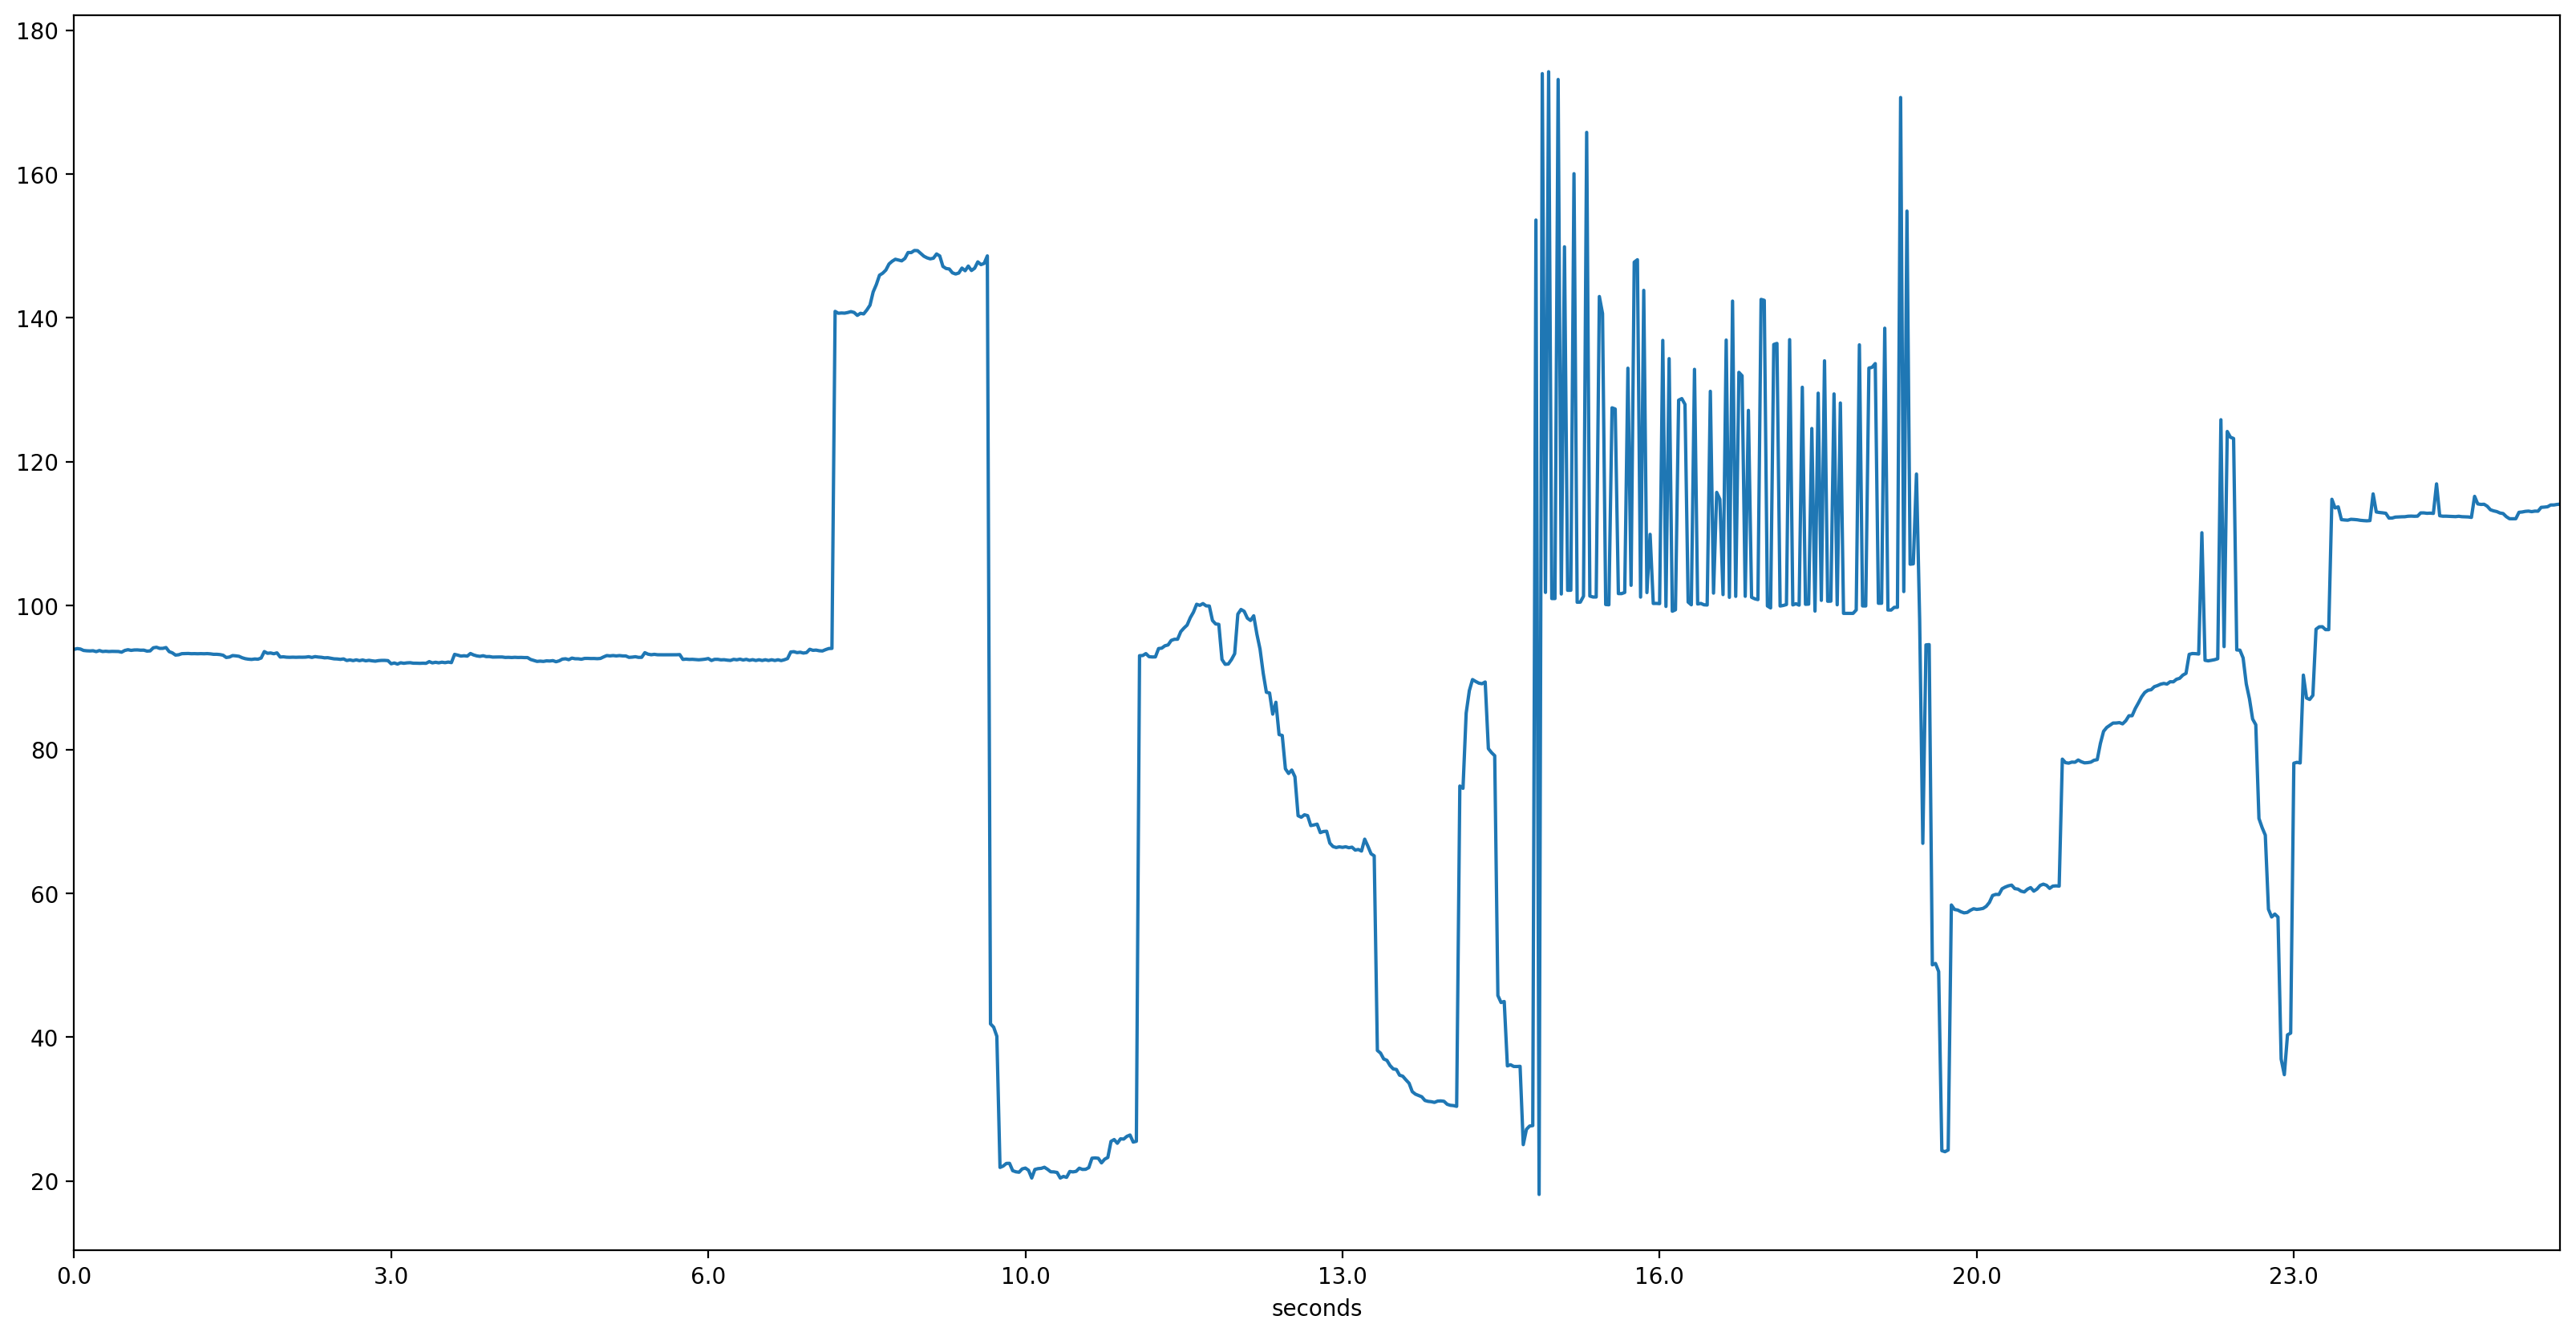

In [145]:
plt.figure(figsize=(20,10))
val = df.groupby('frame').hue.mean().plot.line()
val.set_xlim((0,df.index.get_level_values(0).max()))

val.set_xticklabels(val.get_xticks() // fps)
val.set_xlabel('seconds')
plt.show()

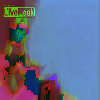

In [148]:
from PIL import Image
frame = df[df.index.get_level_values(0) == 551].to_numpy().reshape((100,100,3))
Image.fromarray(frame)